In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
df = pd.read_csv('../data/census-income.data', header=None)

df.head(2)

,0,1,2,3,4,5,6,7,8,9,...,32,33,34,35,36,37,38,39,40,41
0,73,Not in universe,0,0,High school graduate,0,Not in universe,Widowed,Not in universe or children,Not in universe,...,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,2,0,95,- 50000.
1,58,Self-employed-not incorporated,4,34,Some college but no degree,0,Not in universe,Divorced,Construction,Precision production craft & repair,...,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,2,52,94,- 50000.


In [11]:
# Print the uniquecount of column 41 and the percentage of each unique value
print(df[41].value_counts())
print(df[41].value_counts(normalize=True) * 100)

 - 50000.    187141
 50000+.      12382
Name: 41, dtype: int64
 - 50000.    93.794199
 50000+.      6.205801
Name: 41, dtype: float64


In [13]:
column_names=[
    'age', 'class', 'ind_code_det', 'occ_code_det', 'education', 'wage_hr', 'enroll_edu', 'marital',
    'ind_code_maj', 'occ_code_maj', 'race', 'hisp_origin', 'sex', 'lab_union', 'reason_unemp',
    'emp_status', 'cap_gain', 'cap_loss', 'dividend', 'tax_filer_stat', 'prev_res_area', 'prev_res_state',
    'fam_state', 'fam_state_sum', 'inst_weight', 'migr_change_msa', 'migr_change_reg', 'migr_move_msa', 'lived_1yr',
    'migr_sunbelt', 'num_ppl_worked', 'fam_members_u18', 'birth_dad', 'birth_mom', 'birth_self', 'citizenship',
    'employed_status', 'veteran_admin', 'veteran_benefit', 'weeks_worked', 'year', 'income']

data = pd.read_csv('../census-income.data',header=None)
data.columns=column_names
data['income'] = data['income'].apply(lambda x: 1 if x == ' 50000+.' else 0)
data.head()

,age,class,ind_code_det,occ_code_det,education,wage_hr,enroll_edu,marital,ind_code_maj,occ_code_maj,...,birth_dad,birth_mom,birth_self,citizenship,employed_status,veteran_admin,veteran_benefit,weeks_worked,year,income
0,73,Not in universe,0,0,High school graduate,0,Not in universe,Widowed,Not in universe or children,Not in universe,...,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,2,0,95,0
1,58,Self-employed-not incorporated,4,34,Some college but no degree,0,Not in universe,Divorced,Construction,Precision production craft & repair,...,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,2,52,94,0
2,18,Not in universe,0,0,10th grade,0,High school,Never married,Not in universe or children,Not in universe,...,Vietnam,Vietnam,Vietnam,Foreign born- Not a citizen of U S,0,Not in universe,2,0,95,0
3,9,Not in universe,0,0,Children,0,Not in universe,Never married,Not in universe or children,Not in universe,...,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,0,0,94,0
4,10,Not in universe,0,0,Children,0,Not in universe,Never married,Not in universe or children,Not in universe,...,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,0,0,94,0


- need to figure out continuous variables for this!!

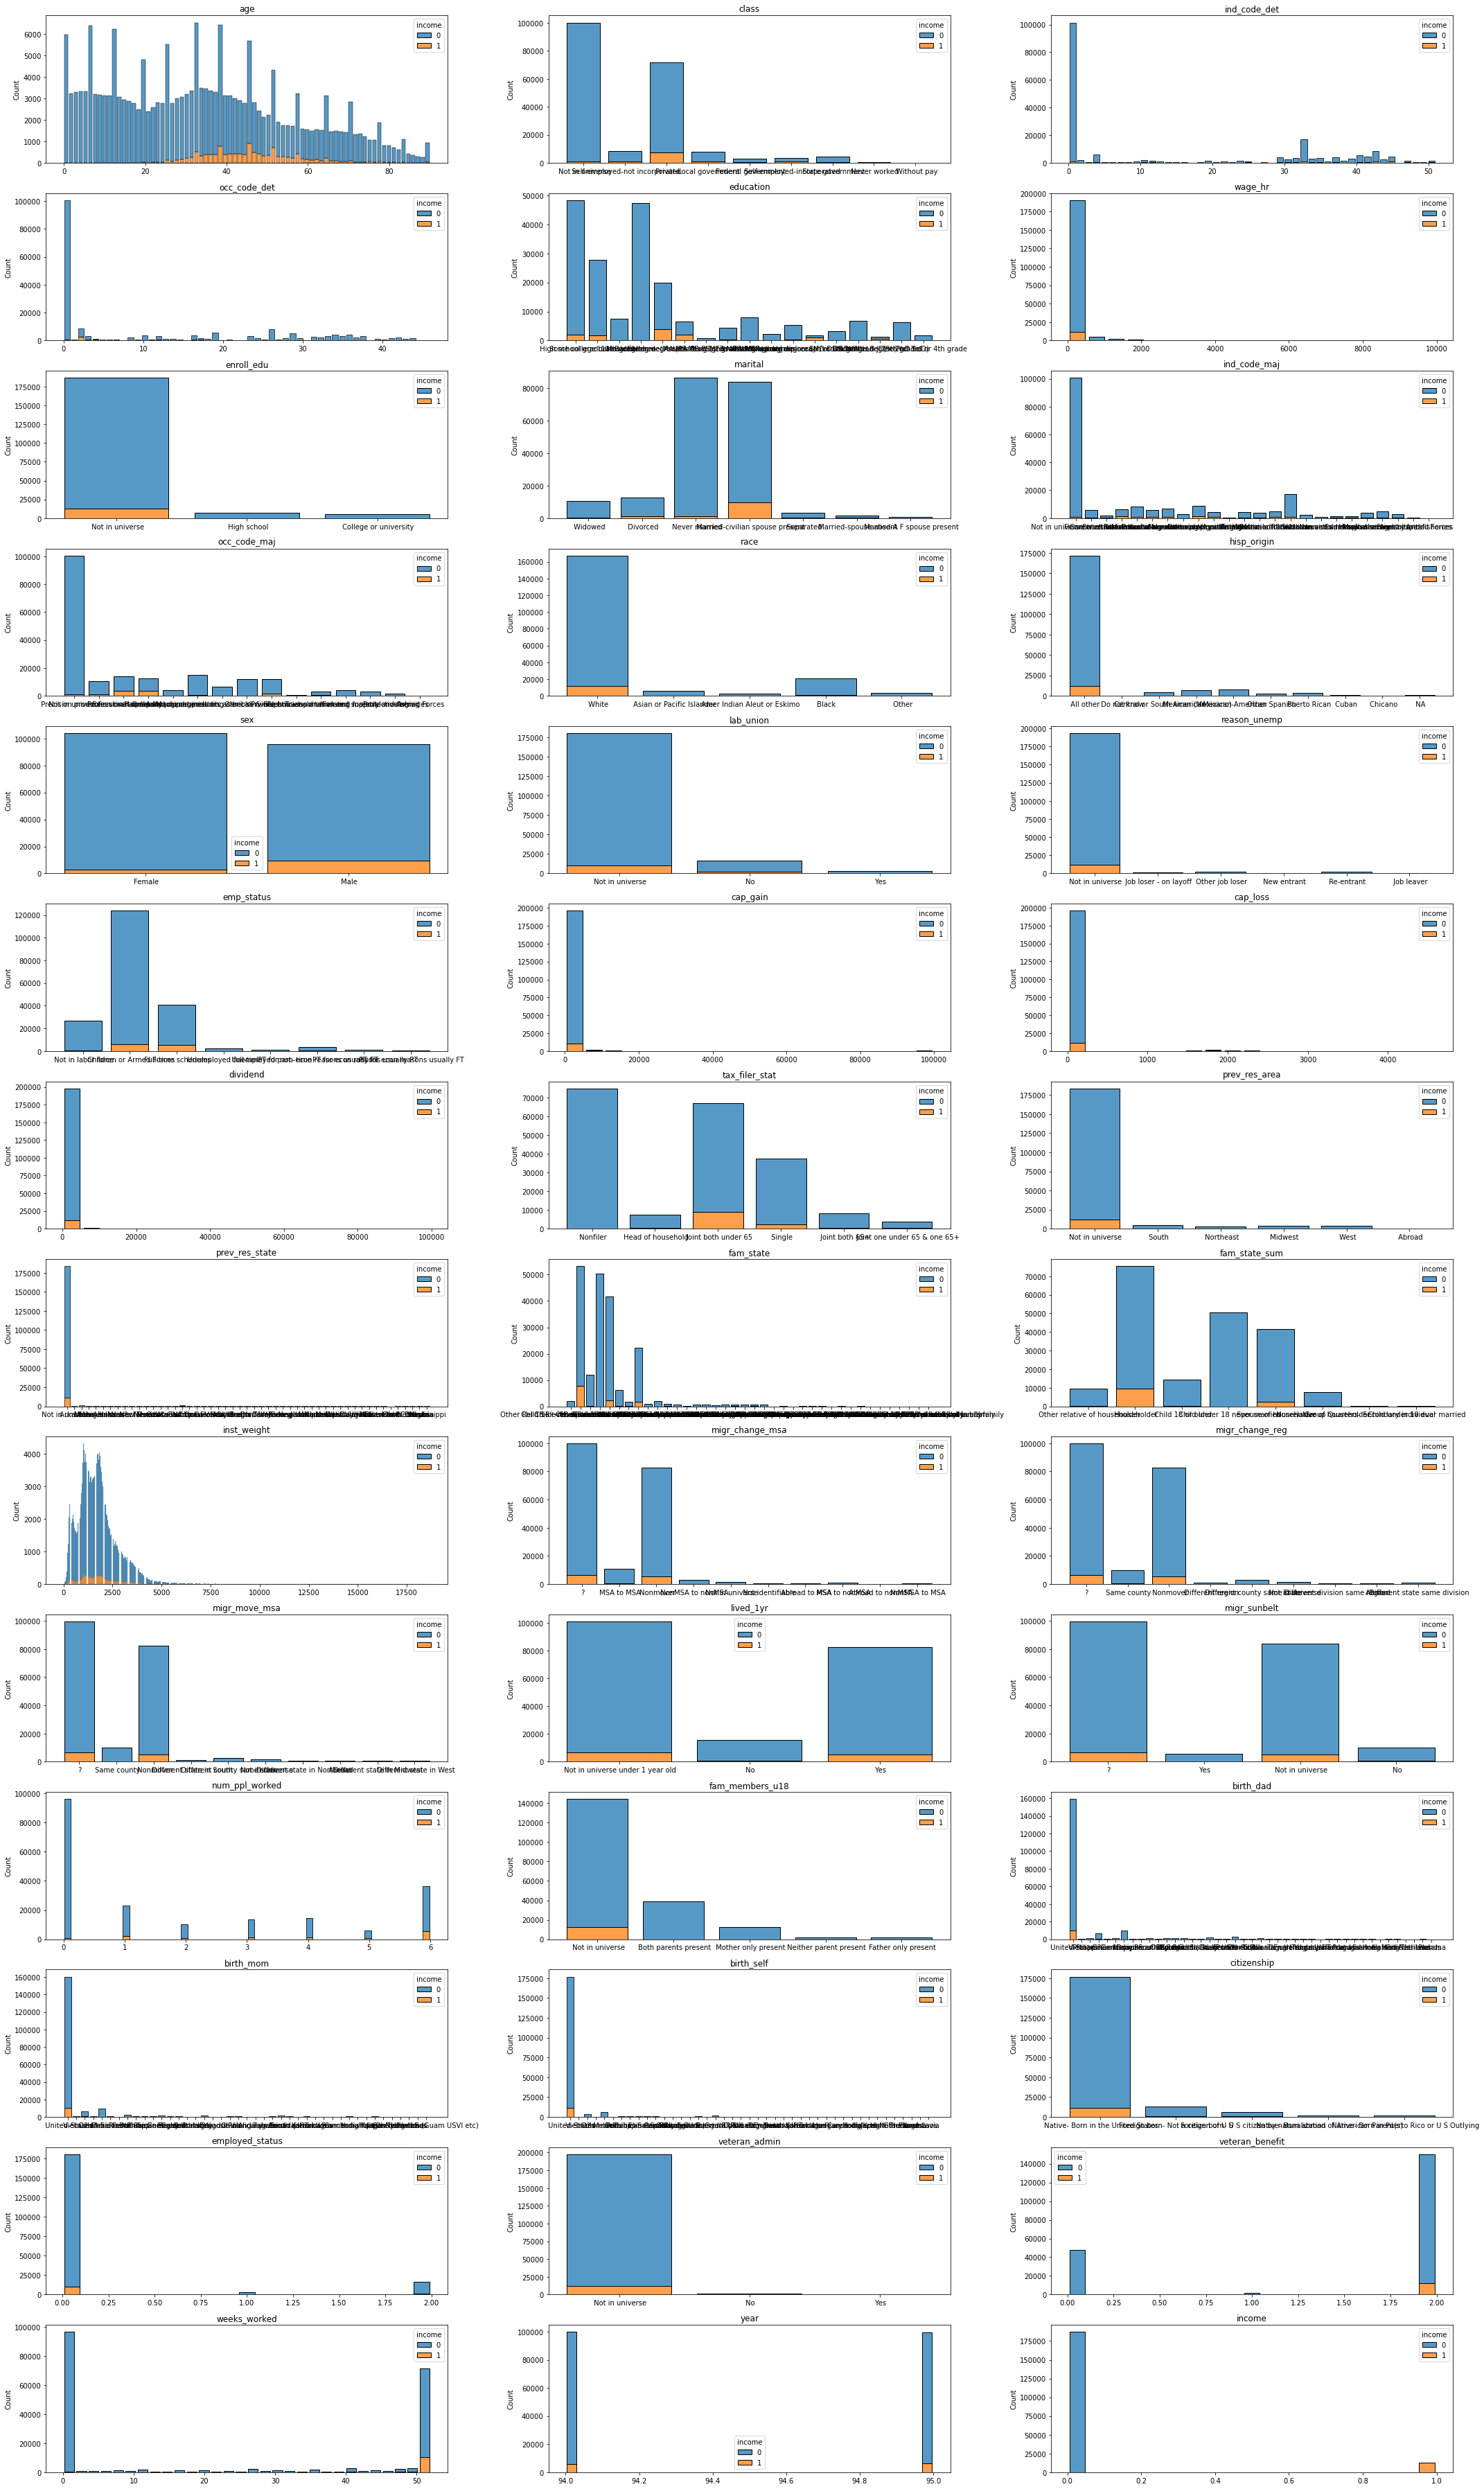

In [27]:
n_cols = 3  # Number of columns for subplots
n_rows = (len(column_names) - 1) // n_cols + 1  # Number of rows for subplots based on the number of predictors
fig, axs = plt.subplots(n_rows, n_cols, figsize=(30, 50))

for i, predictor in enumerate(column_names):
    row = i // n_cols
    col = i % n_cols

    # Plotting the distribution of the predictor with respect to 'income'
    sns.histplot(data=data, x=predictor, hue='income', ax=axs[row, col], multiple='stack', shrink=0.8)

    # Adding title and labels to the subplots
    axs[row, col].set_title(predictor)
    axs[row, col].set_xlabel('')
    axs[row, col].set_ylabel('Count')

# Removing any unused subplots
for i in range(len(column_names), n_rows * n_cols):
    if isinstance(axs, np.ndarray):
        fig.delaxes(axs.flatten()[i])
    else:
        fig.delaxes(axs[i])

# Adjusting the spacing between subplots
fig.tight_layout()

# Displaying the plot
plt.show()
